In [1]:
!ls

ROD.py                 learn_rep_td.py        representations.py
SR_eigen.py            miscel                 reward_shaper.py
Untitled-1.ipynb       plot.py                reward_shaping.py
__pycache__            plotter.py             reward_shaping_fit.py
closed_form_plot.py    q_learner.py           reward_shaping_td.py
dayan_plot.py          r_vs_dist_plot.py      run_reward_shaping.py
figure4.py             rep_4_value.py         td_learn.py
figure_123.py          rep_4_value_new.py     td_learner.py
fit_rep_td.py          rep_plots              utility.py
interactive_example.py rep_utils.py           visualizer.py


In [3]:
%cd ..

/Users/hontiktse/LinearRL/google-research/minigrid_basics


/opt/anaconda3/envs/minigrid/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
import pickle
from os.path import join
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = join("experiments", "reward_shaping")

In [6]:
envs = [
        'dayan', 'dayan_2',
        'fourrooms', 'fourrooms_2',
        'gridroom', 'gridroom_2',
        'gridmaze', 'gridmaze_2'
    ]

In [60]:
def read_data(env, mode, r_aux_w, step_size):
    data_path = join(path, env, mode)
    print(data_path)

    return_list = []

    for seed in range(1, 21):
        filename = f"{r_aux_w}-{step_size}-{seed}.pkl"

        with open(join(data_path, filename), "rb") as f:
            data = pickle.load(f)

            return_list.append(data['ret'])

    return_list = np.array(return_list)
    return data['t'], return_list

In [59]:
for env_name in envs:
    for mode in ["none"]:# ["SR_wang", "SR_potential", "DR_potential"]:

        r_aux_w, step_size = best_setting[env_name][mode]

        print(f"sbatch --array=51-100 reward_shaping.sh {env_name} {mode} {step_size} {r_aux_w}")

sbatch --array=51-100 reward_shaping.sh dayan none 0.3 0
sbatch --array=51-100 reward_shaping.sh dayan_2 none 0.3 0
sbatch --array=51-100 reward_shaping.sh fourrooms none 0.3 0
sbatch --array=51-100 reward_shaping.sh fourrooms_2 none 0.3 0
sbatch --array=51-100 reward_shaping.sh gridroom none 0.3 0
sbatch --array=51-100 reward_shaping.sh gridroom_2 none 1.0 0
sbatch --array=51-100 reward_shaping.sh gridmaze none 1.0 0
sbatch --array=51-100 reward_shaping.sh gridmaze_2 none 1.0 0


In [57]:
best_setting = {
    "dayan": {
        "none": [0, 0.3],
        "SR_wang": [0.25, 0.3],
        "SR_potential": [0.75, 1.0],
        "DR_potential": [0.75, 1.0]
    },
    "dayan_2": {
        "none": [0, 0.3],
        "SR_wang": [0.25, 0.3],
        "SR_potential": [0.5, 0.3],
        "DR_potential": [0.75, 1.0]
    },
    "fourrooms": {
        "none": [0, 0.3],
        "SR_wang": [0.25, 0.3],
        "SR_potential": [0.5, 0.3],
        "DR_potential": [0.75, 1.0]
    },
    "fourrooms_2": {
        "none": [0, 0.3],
        "SR_wang": [0.75, 1.0],
        "SR_potential": [0.25, 1.0],
        "DR_potential": [0.75, 1.0]
    },
    "gridroom": {
        "none": [0, 0.3],
        "SR_wang": [0.25, 0.3],
        "SR_potential": [0.25, 1.0],
        "DR_potential": [0.5, 1.0]
    },
    "gridroom_2": {
        "none": [0, 1.0],
        "SR_wang": [0.25, 1.0],
        "SR_potential": [0.25, 1.0],
        "DR_potential": [0.5, 1.0]
    },
    "gridmaze": {
        "none": [0, 1.0],
        "SR_wang": [0.25, 0.3],
        "SR_potential": [0.25, 1.0],
        "DR_potential": [0.5, 1.0]
    },
    "gridmaze_2": {
        "none": [0, 1.0],
        "SR_wang": [0.5, 1.0],
        "SR_potential": [0.25, 1.0,],
        "DR_potential": [0.5, 1.0]
    }
    }

In [61]:
# for env_name in envs[7:]:
#     for mode in ["SR_wang", "SR_potential", "DR_potential"]:
#         for r_axu_w in [0.5]:# [0.25, 0.5, 0.75, 1.]:
#             for step_size in ["0.1", "0.3", "1.0"]:
#                 t, pref = read_data(env_name, mode, r_axu_w, step_size)
#                 plt.plot(t, np.mean(pref, axis=0), label=f"{mode}-{r_axu_w}-{step_size}")

#         plt.legend()
#         plt.ylim([-200, 0])
#         plt.xlim(0, 100000)
#         plt.show()

                

experiments/reward_shaping/dayan/SR_wang
experiments/reward_shaping/dayan/SR_potential
experiments/reward_shaping/dayan/DR_potential


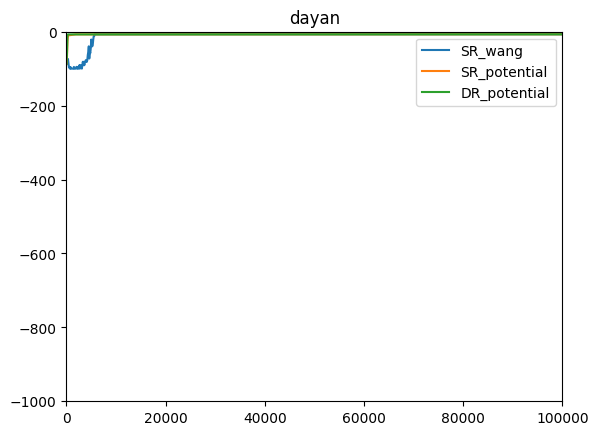

experiments/reward_shaping/dayan_2/SR_wang
experiments/reward_shaping/dayan_2/SR_potential
experiments/reward_shaping/dayan_2/DR_potential


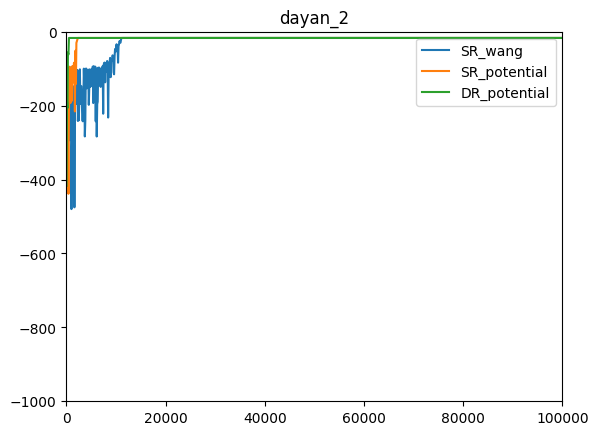

experiments/reward_shaping/fourrooms/SR_wang
experiments/reward_shaping/fourrooms/SR_potential
experiments/reward_shaping/fourrooms/DR_potential


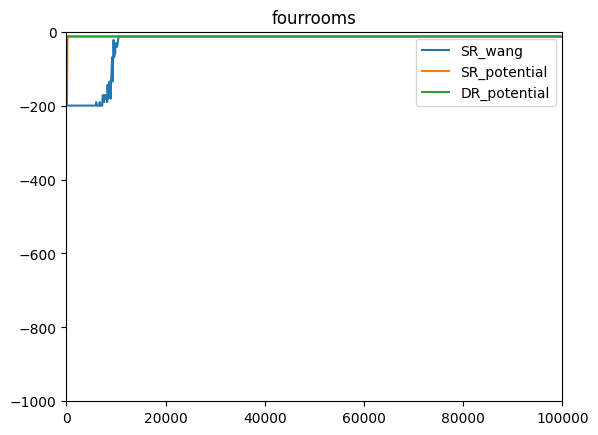

experiments/reward_shaping/fourrooms_2/SR_wang
experiments/reward_shaping/fourrooms_2/SR_potential
experiments/reward_shaping/fourrooms_2/DR_potential


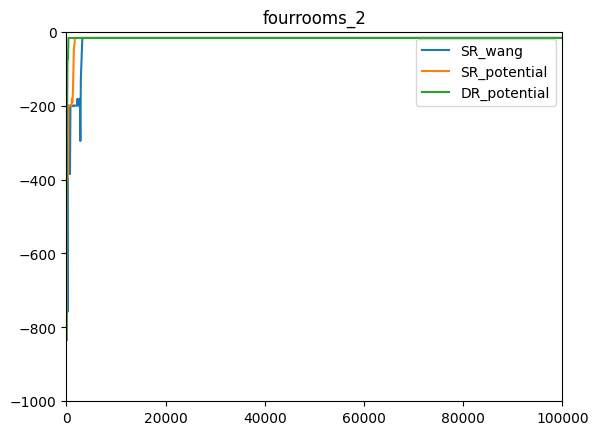

experiments/reward_shaping/gridroom/SR_wang
experiments/reward_shaping/gridroom/SR_potential
experiments/reward_shaping/gridroom/DR_potential


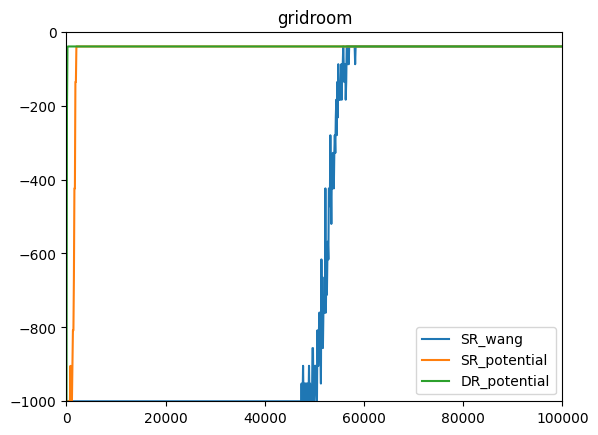

experiments/reward_shaping/gridroom_2/SR_wang
experiments/reward_shaping/gridroom_2/SR_potential
experiments/reward_shaping/gridroom_2/DR_potential


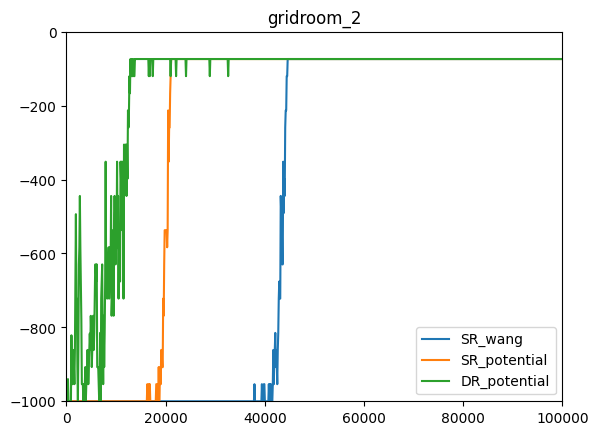

experiments/reward_shaping/gridmaze/SR_wang
experiments/reward_shaping/gridmaze/SR_potential
experiments/reward_shaping/gridmaze/DR_potential


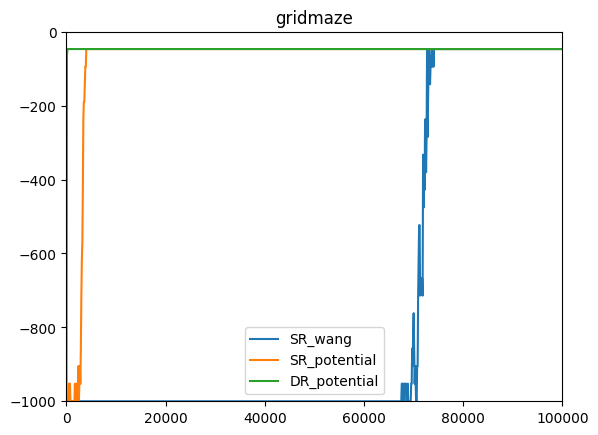

experiments/reward_shaping/gridmaze_2/SR_wang
experiments/reward_shaping/gridmaze_2/SR_potential
experiments/reward_shaping/gridmaze_2/DR_potential


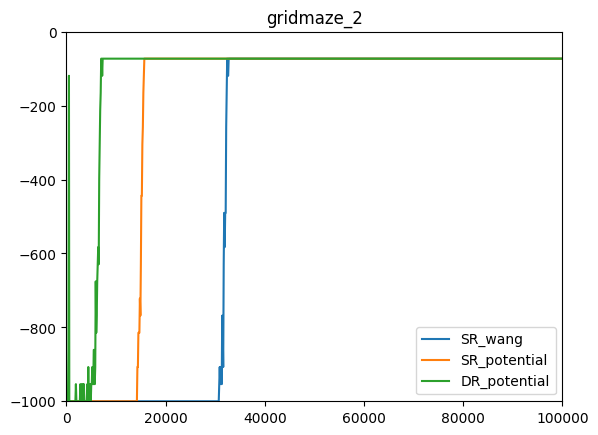

In [ ]:
for env_name in envs:
    for mode in [ "SR_wang", "SR_potential", "DR_potential"]:

        # print(best_setting)[env_name]
        r_aux_w, step_size = best_setting[env_name][mode]

        t, perf = read_data(env_name, mode,r_aux_w, step_size)
        plt.plot(t, np.mean(perf, axis=0), label=f"{mode}")

        # print(pref.mean(0)[-1])

    plt.legend()
    plt.ylim([-1000, 0])
    plt.xlim(0, 100000)
    plt.title(env_name)
    plt.show()
            